In [51]:
import pandas as pd
from scipy.spatial import distance_matrix

In [52]:
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/movies/movies.csv'
data = pd.read_csv(url, sep=';')
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [53]:
movies = data.columns.to_list()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [54]:
#No es necesario normalizar porque todas vienen entre 0 y 10

In [55]:
dd1 = distance_matrix(data[movies],data[movies],p=1)
dd2 = distance_matrix(data[movies],data[movies],p=2)
dd10 = distance_matrix(data[movies],data[movies],p=10)

In [56]:
def dm_to_df(dd,col_name):
  import pandas as pd
  return pd.DataFrame(dd,index=col_name, columns=col_name)

In [57]:
dm_to_df(dd1,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [58]:
dm_to_df(dd2,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [59]:
dm_to_df(dd10,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

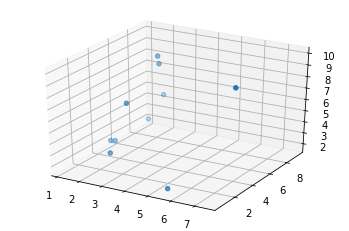

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=data[movies[0]], ys=data[movies[1]], zs=data[movies[2]])

#Enlace

A continuación se realiza la clusterización de manera manual

In [62]:
df_dd1 = dm_to_df(dd1,data['user_id'])
df_dd1

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [63]:
Z=[] #id1, id2, d, n_elementos
#juntamos el 1 y el 10 que son los más cercanos
df_dd1[11] = df_dd1[1] + df_dd1[10]
df_dd1.loc[11] = df_dd1.loc[1] + df_dd1.loc[10]
Z.append([1,10,0.7,2])
df_dd1 

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [64]:
#con la metodología del más corto, se reemplazarán los datos de la fila 11 por el menor de los valores de 1 o 10 a cada número
for i in df_dd1.columns.values.tolist():
  df_dd1.loc[11][i] = min(df_dd1.loc[1][i],df_dd1.loc[10][i])
  df_dd1.loc[i][11] = min(df_dd1.loc[i][1], df_dd1.loc[i][10])
df_dd1

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [65]:
df_dd1 = df_dd1.drop([1,10], axis=0)
df_dd1 = df_dd1.drop([1,10], axis=1)
df_dd1

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [66]:
x = 2
y = 7
z = 12
n = 2

df_dd1[z] = df_dd1[x] + df_dd1[y]
df_dd1.loc[z] = df_dd1.loc[x] + df_dd1.loc[y]
Z.append([x,y,df_dd1.loc[x][y],n])
for i in df_dd1.columns.values.tolist():
  df_dd1.loc[z][i] = min(df_dd1.loc[x][i],df_dd1.loc[y][i])
  df_dd1.loc[i][z] = min(df_dd1.loc[i][x], df_dd1.loc[i][y])
df_dd1 = df_dd1.drop([x,y], axis=0)
df_dd1 = df_dd1.drop([x,y], axis=1)
df_dd1

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [67]:
x = 8
y = 5
z = 13
n = 2

df_dd1[z] = df_dd1[x] + df_dd1[y]
df_dd1.loc[z] = df_dd1.loc[x] + df_dd1.loc[y]
Z.append([x,y,df_dd1.loc[x][y],n])
for i in df_dd1.columns.values.tolist():
  df_dd1.loc[z][i] = min(df_dd1.loc[x][i],df_dd1.loc[y][i])
  df_dd1.loc[i][z] = min(df_dd1.loc[i][x], df_dd1.loc[i][y])
df_dd1 = df_dd1.drop([x,y], axis=0)
df_dd1 = df_dd1.drop([x,y], axis=1)
df_dd1

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [68]:
x = 11
y = 13
z = 14
n = 2

df_dd1[z] = df_dd1[x] + df_dd1[y]
df_dd1.loc[z] = df_dd1.loc[x] + df_dd1.loc[y]
Z.append([x,y,df_dd1.loc[x][y],n])
for i in df_dd1.columns.values.tolist():
  df_dd1.loc[z][i] = min(df_dd1.loc[x][i],df_dd1.loc[y][i])
  df_dd1.loc[i][z] = min(df_dd1.loc[i][x], df_dd1.loc[i][y])
df_dd1 = df_dd1.drop([x,y], axis=0)
df_dd1 = df_dd1.drop([x,y], axis=1)
df_dd1

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


In [69]:
#el 14 está a la misma distancia del 9 y el 12, por lo que ahora se unirán 3 puntos
x = 14
y = 9
y1= 12

z = 15
n = 3

df_dd1[z] = df_dd1[x] + df_dd1[y]+ df_dd1[y1]
df_dd1.loc[z] = df_dd1.loc[x] + df_dd1.loc[y]+ df_dd1.loc[y1]
Z.append([x,[y,y1],df_dd1.loc[x][y],n])
for i in df_dd1.columns.values.tolist():
  df_dd1.loc[z][i] = min(df_dd1.loc[x][i], df_dd1.loc[y][i], df_dd1.loc[y1][i])
  df_dd1.loc[i][z] = min(df_dd1.loc[i][x], df_dd1.loc[i][y], df_dd1.loc[i][y1])
df_dd1 = df_dd1.drop([x,y,y1], axis=0)
df_dd1 = df_dd1.drop([x,y,y1], axis=1)
df_dd1

user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


In [70]:
#el 14 está a la misma distancia del 9 y el 12, por lo que ahora se unirán 3 puntos
x = 15
y = 4
y1= 6

z = 16
n = 3

df_dd1[z] = df_dd1[x] + df_dd1[y]+ df_dd1[y1]
df_dd1.loc[z] = df_dd1.loc[x] + df_dd1.loc[y]+ df_dd1.loc[y1]
Z.append([x,[y,y1],df_dd1.loc[x][y],n])
for i in df_dd1.columns.values.tolist():
  df_dd1.loc[z][i] = min(df_dd1.loc[x][i], df_dd1.loc[y][i], df_dd1.loc[y1][i])
  df_dd1.loc[i][z] = min(df_dd1.loc[i][x], df_dd1.loc[i][y], df_dd1.loc[i][y1])
df_dd1 = df_dd1.drop([x,y,y1], axis=0)
df_dd1 = df_dd1.drop([x,y,y1], axis=1)
df_dd1

user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


In [71]:
x = 3
y = 16
z = 17
n = 2

df_dd1[z] = df_dd1[x] + df_dd1[y]
df_dd1.loc[z] = df_dd1.loc[x] + df_dd1.loc[y]
Z.append([x,y,df_dd1.loc[x][y],n])
for i in df_dd1.columns.values.tolist():
  df_dd1.loc[z][i] = min(df_dd1.loc[x][i],df_dd1.loc[y][i])
  df_dd1.loc[i][z] = min(df_dd1.loc[i][x], df_dd1.loc[i][y])
df_dd1 = df_dd1.drop([x,y], axis=0)
df_dd1 = df_dd1.drop([x,y], axis=1)
df_dd1

user_id,17
user_id,
17,0.0


In [72]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [8, 5, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [14, [9, 12], 4.9, 3],
 [15, [4, 6], 5.499999999999999, 3],
 [3, 16, 9.0, 2]]

#Clustering jerárquico usando Python

In [73]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [74]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [75]:
Z = linkage(data[movies],method='ward')
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

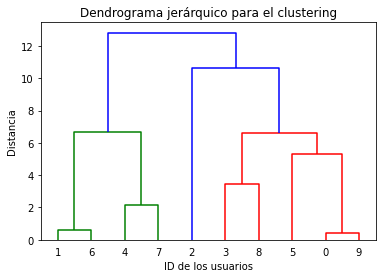

In [76]:
plt.figure()
plt.title('Dendrograma jerárquico para el clustering')
plt.xlabel('ID de los usuarios')
plt.ylabel('Distancia')
dendrogram(Z,leaf_font_size=10)
plt.show()

In [77]:
Z = linkage(data[movies],method='average')
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 8.        , 10.        ,  3.46355712,  3.        ],
       [ 5.        , 13.        ,  4.37331672,  4.        ],
       [11.        , 12.        ,  4.75772945,  4.        ],
       [ 3.        , 14.        ,  5.51984068,  5.        ],
       [15.        , 16.        ,  6.87496749,  9.        ],
       [ 2.        , 17.        ,  8.78305268, 10.        ]])

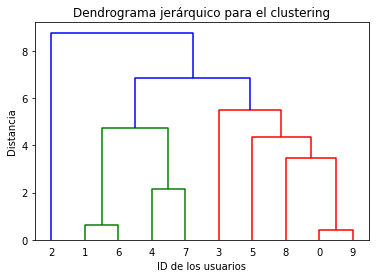

In [78]:
plt.figure()
plt.title('Dendrograma jerárquico para el clustering')
plt.xlabel('ID de los usuarios')
plt.ylabel('Distancia')
dendrogram(Z,leaf_font_size=10)
plt.show()

In [79]:
Z = linkage(data[movies],method='complete')
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  4.74236228,  3.        ],
       [11.        , 12.        ,  5.92199291,  4.        ],
       [13.        , 14.        ,  6.47610994,  5.        ],
       [ 2.        , 16.        , 10.14347081,  6.        ],
       [15.        , 17.        , 10.82312339, 10.        ]])

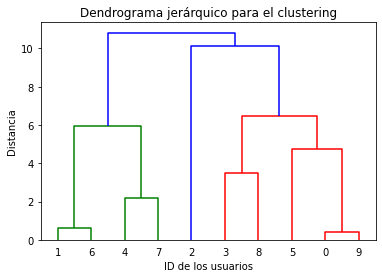

In [80]:
plt.figure()
plt.title('Dendrograma jerárquico para el clustering')
plt.xlabel('ID de los usuarios')
plt.ylabel('Distancia')
dendrogram(Z,leaf_font_size=10)
plt.show()

In [81]:
Z = linkage(data[movies],method='single')
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 8.        , 10.        ,  3.29393382,  3.        ],
       [12.        , 13.        ,  3.44963766,  5.        ],
       [ 3.        , 14.        ,  3.48281495,  6.        ],
       [11.        , 15.        ,  3.6180105 ,  8.        ],
       [ 5.        , 16.        ,  3.94588393,  9.        ],
       [ 2.        , 17.        ,  6.00499792, 10.        ]])

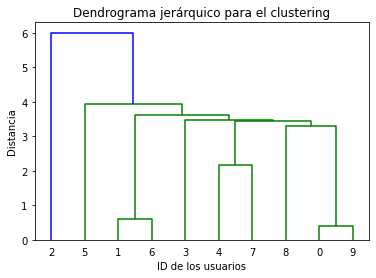

In [82]:
plt.figure()
plt.title('Dendrograma jerárquico para el clustering')
plt.xlabel('ID de los usuarios')
plt.ylabel('Distancia')
dendrogram(Z,leaf_font_size=10)
plt.show()